In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15872\530123793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.age=data.age.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [8]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [9]:
data['gender']=data['gender'].replace({'Male':0,'Female':1,'Other':2})
data['ever_married']=data['ever_married'].replace({'No':0,'Yes':1})
data['work_type']=data['work_type'].replace({'Govt_job':0,'Private':1,'Self-employed':2,'children':3,'Never_worked':4})
data['Residence_type']=data['Residence_type'].replace({'Rural':0,'Urban':1})
data['smoking_status']=data['smoking_status'].replace({'Unknown':0,'never smoked':1,'smokes':2,'formerly smoked':3})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_15872\782110761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender']=data['gender'].replace({'Male':0,'Female':1,'Other':2})
C:\Users\Admin\AppData\Local\Temp\ipykernel_15872\782110761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ever_married']=data['ever_married'].replace({'No':0,'Yes':1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_15872\782110761.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [10]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,1,1,228.69,36.600000,3,1
1,51676,1,61,0,0,1,2,0,202.21,28.893237,1,1
2,31112,0,80,0,1,1,1,0,105.92,32.500000,1,1
3,60182,1,49,0,0,1,1,1,171.23,34.400000,2,1
4,1665,1,79,1,0,1,2,0,174.12,24.000000,1,1


In [11]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,1,1,228.69,36.600000,3,1
1,51676,1,61,0,0,1,2,0,202.21,28.893237,1,1
2,31112,0,80,0,1,1,1,0,105.92,32.500000,1,1
3,60182,1,49,0,0,1,1,1,171.23,34.400000,2,1
4,1665,1,79,1,0,1,2,0,174.12,24.000000,1,1
5,56669,0,81,0,0,1,1,1,186.21,29.000000,3,1
6,53882,0,74,1,1,1,1,0,70.09,27.400000,1,1
7,10434,1,69,0,0,0,1,1,94.39,22.800000,1,1
8,27419,1,59,0,0,1,1,0,76.15,28.893237,0,1
9,60491,1,78,0,0,1,1,1,58.57,24.200000,0,1


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [14]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (4088, 11)
x_test shape: (1022, 11)
y_train shape: (4088,)
x_test shape: (1022, 11)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[971   1]
 [ 50   0]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


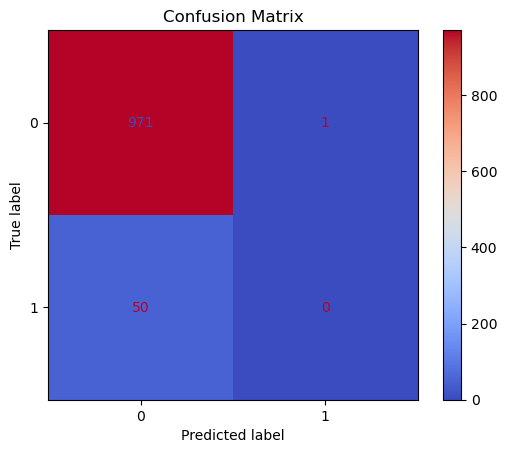

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [18]:
TN, FP, FN, TP = cm.ravel()
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

TP: 0, FP: 1, TN: 971, FN: 50


In [19]:
metrics_matrix = pd.DataFrame(
    {
        "Predicted Negative": [TN, FN],
        "Predicted Positive": [FP, TP],
    },
    index=["Actual Negative", "Actual Positive"]
)
print(metrics_matrix)

                 Predicted Negative  Predicted Positive
Actual Negative                 971                   1
Actual Positive                  50                   0


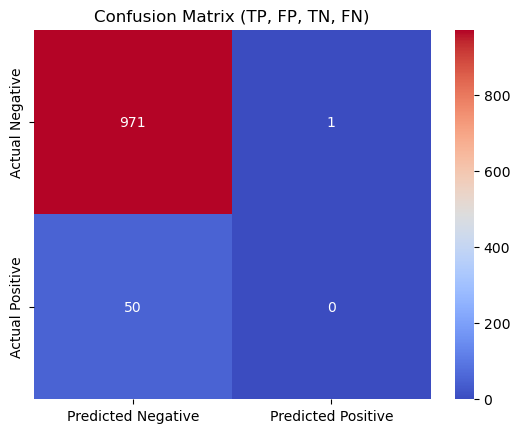

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(metrics_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix (TP, FP, TN, FN)")
plt.show()

In [21]:
Sensitivity=TP/(TP+FN)*100
print("Sensitivity of ",data," is ",round(Sensitivity,2))
Specificity=TN/(TN+FP)*100
print("Specificity of ",data," is ",round(Specificity,2))

Sensitivity of           id  gender  age  hypertension  heart_disease  ever_married  \
0      9046       0   67             0              1             1   
1     51676       1   61             0              0             1   
2     31112       0   80             0              1             1   
3     60182       1   49             0              0             1   
4      1665       1   79             1              0             1   
...     ...     ...  ...           ...            ...           ...   
5105  18234       1   80             1              0             1   
5106  44873       1   81             0              0             1   
5107  19723       1   35             0              0             1   
5108  37544       0   51             0              0             1   
5109  44679       1   44             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             1               1             228.69

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Function to evaluate model
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    
    if isinstance(model, LinearRegression):
        y_pred_probs = model.predict(x_test)
        y_pred = (y_pred_probs > 0.5).astype(int)
    else:
        y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    sensitivity = TP / (TP + FN) * 100
    specificity = TN / (TN + FP) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {round(accuracy, 2)}%")
    print(f"Sensitivity (Recall): {round(sensitivity, 2)}%")
    print(f"Specificity: {round(specificity, 2)}%")
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"],
                             columns=["Predicted Negative", "Predicted Positive"]),
                annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: AdaBoostClassifier
Accuracy: 95.11%
Sensitivity (Recall): 2.0%
Specificity: 99.9%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022



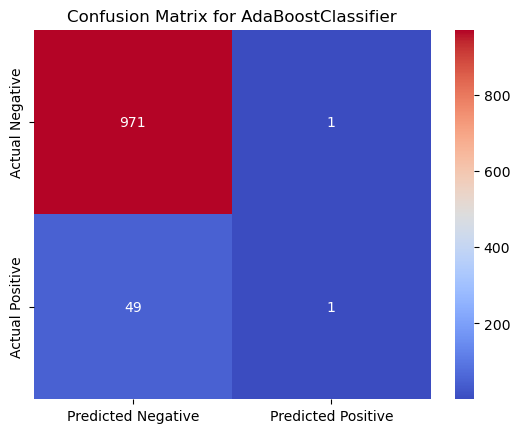

In [23]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=100)
evaluate_model(adaboost_model, x_train, x_test, y_train, y_test)


Model: LinearRegression
Accuracy: 95.11%
Sensitivity (Recall): 0.0%
Specificity: 100.0%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


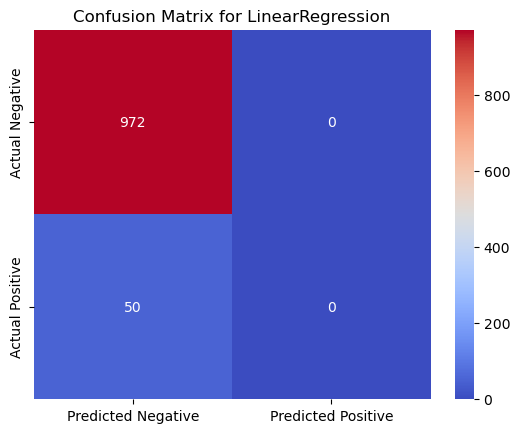

In [24]:
# Linear Regression (Not ideal for classification, but for experiment)
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
evaluate_model(linreg_model, x_train, x_test, y_train, y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: LogisticRegression
Accuracy: 95.01%
Sensitivity (Recall): 0.0%
Specificity: 99.9%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



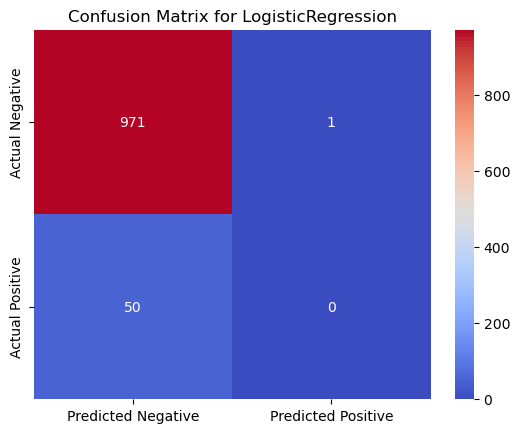

In [25]:
#  Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, x_train, x_test, y_train, y_test)


Model: GradientBoostingClassifier
Accuracy: 95.01%
Sensitivity (Recall): 4.0%
Specificity: 99.69%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.40      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.68      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022



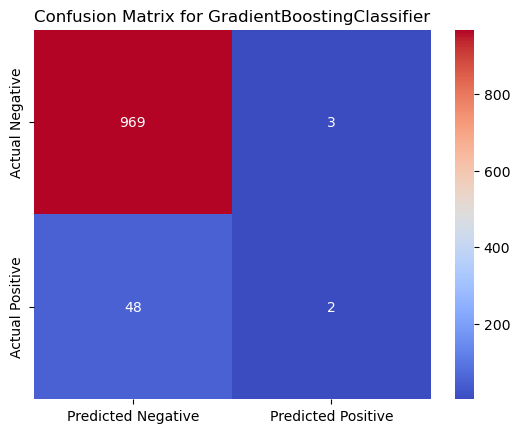

In [26]:
#  Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, x_train, x_test, y_train, y_test)


Model: KNeighborsClassifier
Accuracy: 95.11%
Sensitivity (Recall): 0.0%
Specificity: 100.0%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


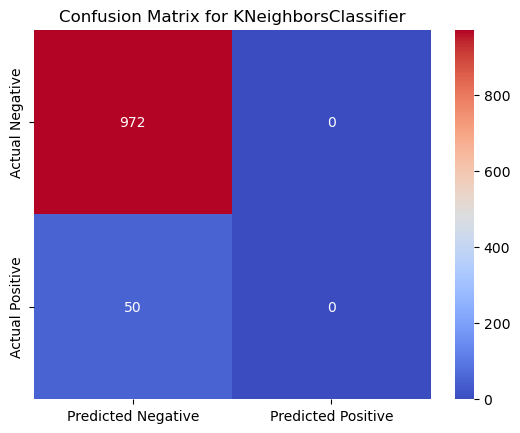

In [27]:
#  K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, x_train, x_test, y_train, y_test)


Model: DecisionTreeClassifier
Accuracy: 91.49%
Sensitivity (Recall): 12.0%
Specificity: 95.58%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



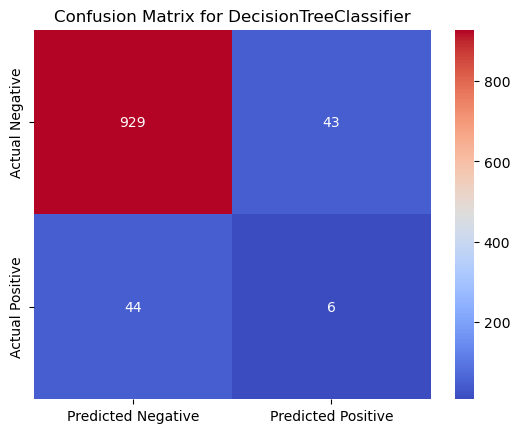

In [28]:
#  Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, x_train, x_test, y_train, y_test)


Model: GaussianNB
Accuracy: 92.56%
Sensitivity (Recall): 20.0%
Specificity: 96.3%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.22      0.20      0.21        50

    accuracy                           0.93      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.92      0.93      0.92      1022



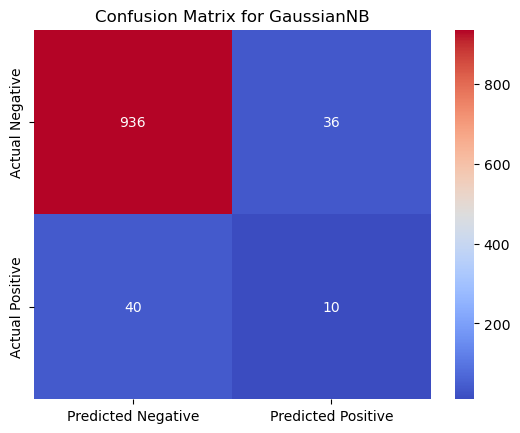

In [29]:
#  Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
evaluate_model(nb_model, x_train, x_test, y_train, y_test)


Model: SVC
Accuracy: 95.11%
Sensitivity (Recall): 0.0%
Specificity: 100.0%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


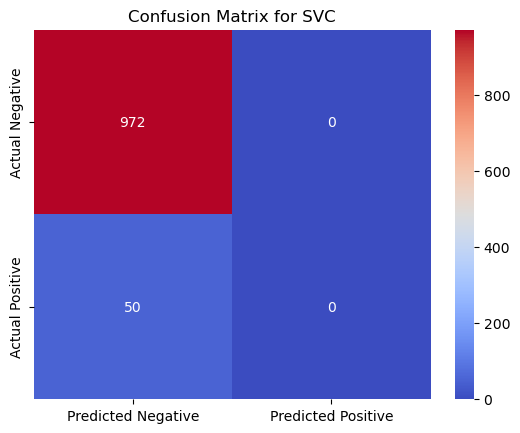

In [30]:
#  Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True)
evaluate_model(svm_model, x_train, x_test, y_train, y_test)


Model: MLPClassifier
Accuracy: 94.52%
Sensitivity (Recall): 4.0%
Specificity: 99.18%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.58      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



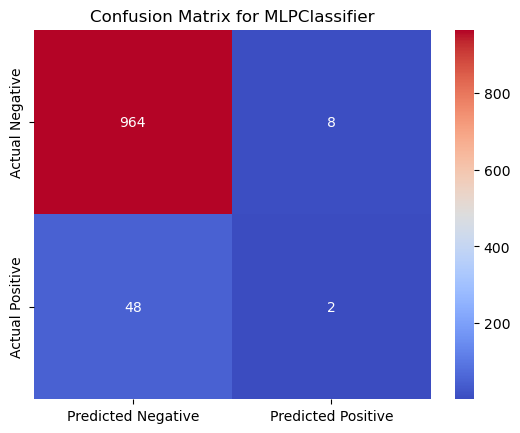

In [31]:
#  Multi-Layer Perceptron (MLP) - Neural Network
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
evaluate_model(mlp_model, x_train, x_test, y_train, y_test)


Model: RandomForestClassifier
Accuracy: 95.11%
Sensitivity (Recall): 0.0%
Specificity: 100.0%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


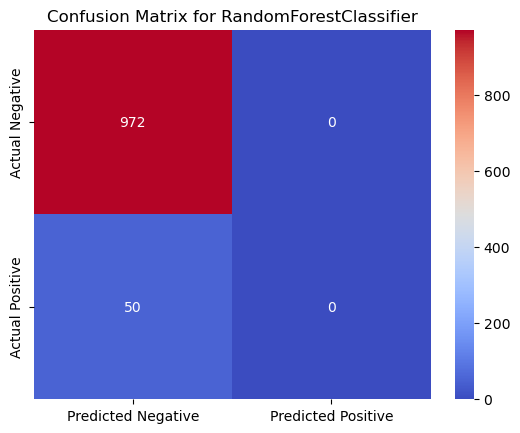

In [32]:
#  Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [33]:
# XGBoost (Extreme Gradient Boosting)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# LightGBM (Light Gradient Boosting Machine)
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
evaluate_model(lgbm_model, x_train, x_test, y_train, y_test)